# Libraries imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import month_plot # for seasonal plots
from statsmodels.graphics.tsaplots import plot_acf # for plotting acf
from statsmodels.tsa.stattools import acf # for getting autocorrelation coefficients

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# to set-up a usually more reading plotting format
plt.rcParams["figure.figsize"] = (12,4)

# **Time serie analysis with Numpy and Pandas and basic visualization**

## Forecasting with Numpy

In [ ]:
# how to define array with date formats
date = np.array('2020-12-14', dtype=np.datetime64)
date = date + np.arange(12)
date

array(['2020-12-14', '2020-12-15', '2020-12-16', '2020-12-17',
       '2020-12-18', '2020-12-19', '2020-12-20', '2020-12-21',
       '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25'],
      dtype='datetime64[D]')

In [ ]:
# creating a random array with values ranging from min to max
values = np.random.uniform(0,100,size = 12)
values

array([53.65196433, 86.83859827, 40.9443671 ,  9.71419914, 45.23629066,
       99.79463916, 23.90984843, 86.74646889,  3.30457944, 17.83649453,
       56.0351394 , 22.18579558])

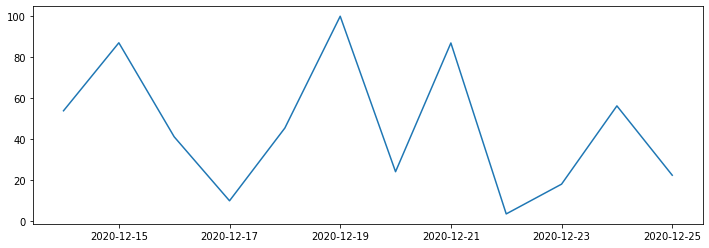

In [ ]:
# plotting the values versus time with plt
plt.plot(date,values)

In [ ]:
# in case you are not in days but seconds (can use other units for ms etc.)
np.datetime64('2020-12-14 10:00:00', 's') + np.arange(12)

array(['2020-12-14T10:00:00', '2020-12-14T10:00:01',
       '2020-12-14T10:00:02', '2020-12-14T10:00:03',
       '2020-12-14T10:00:04', '2020-12-14T10:00:05',
       '2020-12-14T10:00:06', '2020-12-14T10:00:07',
       '2020-12-14T10:00:08', '2020-12-14T10:00:09',
       '2020-12-14T10:00:10', '2020-12-14T10:00:11'],
      dtype='datetime64[s]')

## Setting a time series with Pandas

In [ ]:
# we create a DataFrame from our two arrays that we treat like two series. We specify the data in a dictionnary format
df = pd.DataFrame({'Date':date, 'Values':values})
df.head()

,Date,Values
0,2020-12-14,53.651964
1,2020-12-15,86.838598
2,2020-12-16,40.944367
3,2020-12-17,9.714199
4,2020-12-18,45.236291


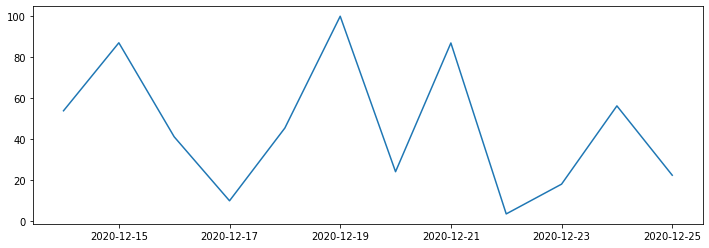

In [ ]:
# plotting the data using pandas reference
# Note you can also use the native plot function in pandas df.plot()
plt.plot(df['Date'],df['Values'])

## Setting a time series with Pandas from an Excel file

Let's take the data from the file oil.csv. It is about the annual oil production (millions of tonnes), Saudi Arabia, 1965-2013. (source R dataset from https://vincentarelbundock.github.io/Rdatasets/datasets.html)

In [ ]:
# a direct import give the following results
df = pd.read_csv('oil.csv')
df.head()

,Unnamed: 0,time,value
0,1,1965,111.009135
1,2,1966,130.828434
2,3,1967,141.287088
3,4,1968,154.227775
4,5,1969,162.740865


In [ ]:
# the index column is not useful, we can get rid of this specify the following argument index_col
df = pd.read_csv('oil.csv', index_col=0)
df.head()

,time,value
1,1965,111.009135
2,1966,130.828434
3,1967,141.287088
4,1968,154.227775
5,1969,162.740865


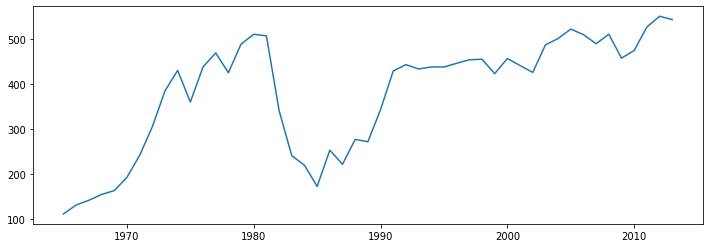

In [ ]:
# Having a quick look at it
plt.plot(df['time'],df['value'])

## Basic stats

In [ ]:
# a very high level function
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    49 non-null     int64  
 1   value   49 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [ ]:
# to get the five number and a bit more
df.describe()

,time,value
count,49.00000,49.000000
mean,1989.00000,379.984547
std,14.28869,128.488137
min,1965.00000,111.009135
25%,1977.00000,271.147952
50%,1989.00000,432.785148
75%,2001.00000,473.816603
max,2013.00000,549.833808


In [ ]:
# you can get specific stats calling the specific function on the column you want
df['value'].mean()

379.9845472867754

## Visualisation basics

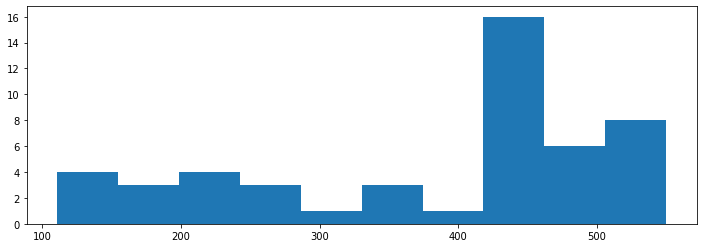

In [ ]:
# you can be interested to visualise the distribution of your time series
fig = plt.hist(df['value'])

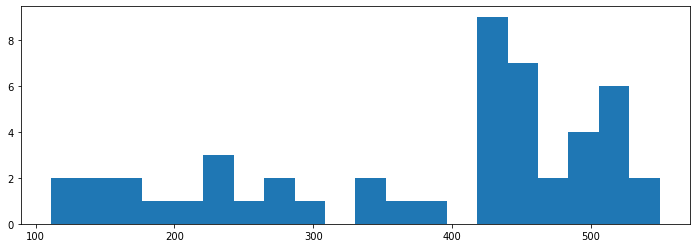

In [ ]:
# to change the intervals of each bar, use the argument bins
fig = plt.hist(df['value'], bins = 20)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


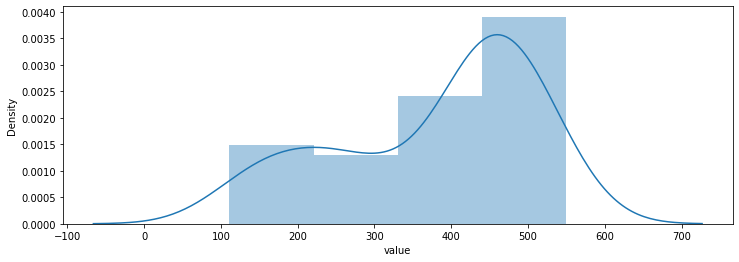

In [ ]:
#matplotlib is a bit "raw" for this, seaborn has bit more built-in tools
fig = sns.distplot(df['value'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


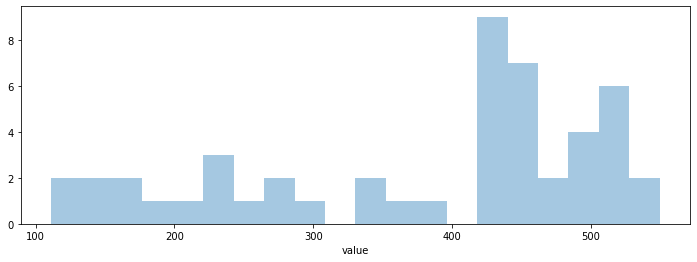

In [ ]:
# without the distribution function and changing the bins
fig = sns.distplot(df['value'], kde = False, bins = 20)

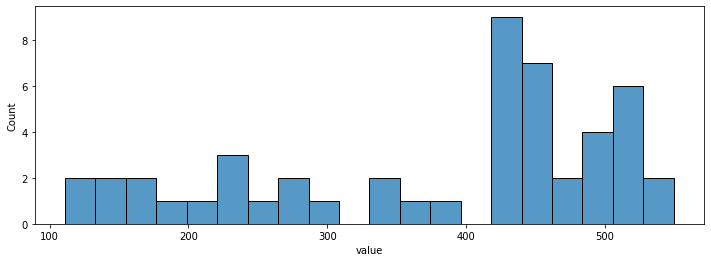

In [ ]:
# or simply hist function of seaborn
fig = sns.histplot(df['value'], bins = 20)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


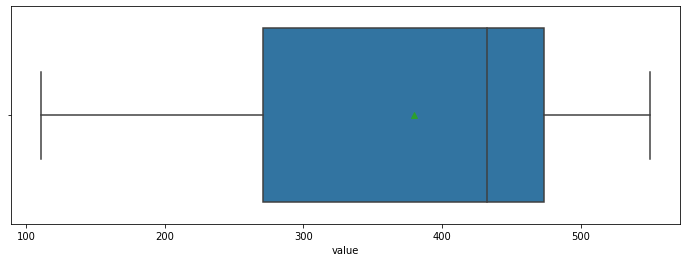

In [ ]:
# pretty useful type of chart: boxplots
fig = sns.boxplot(df['value'], showmeans = True)

# Common patterns in time series

## Seasonal plots

Let's take the data from the file a10.csv. Monthly government expenditure (millions of dollars) as part of the Pharmaceutical Benefit Scheme for products falling under ATC code A10 as recorded by the Australian Health Insurance Commission. July 1991 - June 2008. (source R dataset from https://vincentarelbundock.github.io/Rdatasets/datasets.html)

In [ ]:
# let's have a look to the data
df = pd.read_csv('a10.csv',index_col = 0)
df.head()

,time,value
1,1991.500000,3.526591
2,1991.583333,3.180891
3,1991.666667,3.252221
4,1991.750000,3.611003
5,1991.833333,3.565869


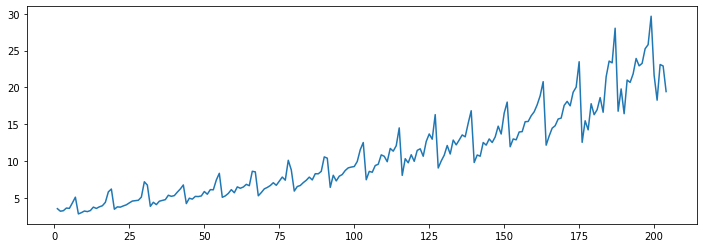

In [ ]:
# you need to get this habit: plot straight away
plt.plot(df['value'])

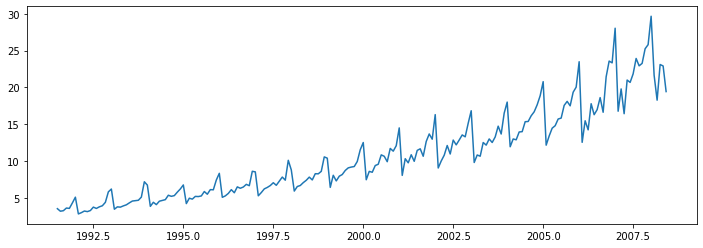

In [ ]:
# we might want to see the time on the x-axis rather than the index
plt.plot(df['time'], df['value'])

In [ ]:
# better to convert this date format into a more readable one
df['year']=np.trunc(df['time']).astype(int)
df['month']= np.round((df['time'] - df['year'])*12+1).astype(int)
df['day'] = 1
df['date'] = pd.to_datetime(df[['year','month','day']])
df.head()

,time,value,year,month,date,day
1,1991.500000,3.526591,1991,7,1991-07-01,1
2,1991.583333,3.180891,1991,8,1991-08-01,1
3,1991.666667,3.252221,1991,9,1991-09-01,1
4,1991.750000,3.611003,1991,10,1991-10-01,1
5,1991.833333,3.565869,1991,11,1991-11-01,1


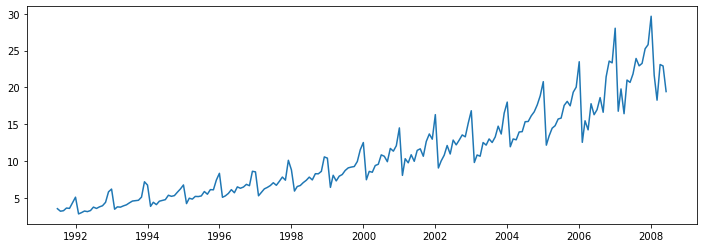

In [ ]:
# see the results on a plot
plt.plot(df['date'],df['value'])

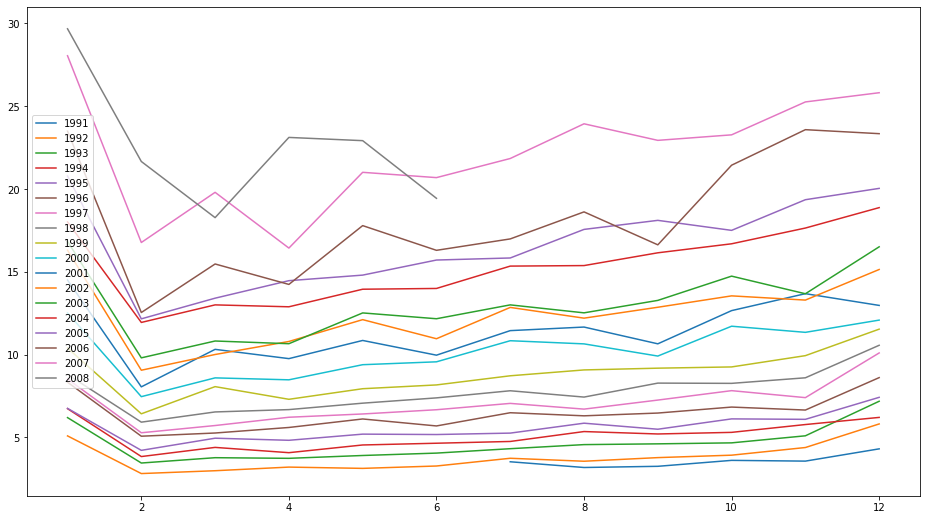

In [ ]:
# the main principles of the seasonal plots: one line per year

plt.figure(figsize=(16,9))

for i in df['year'].unique():
  #c +=1
  index_year = df['year'] == i
  plt.plot(df[index_year]['month'],df[index_year]['value'], label = str(i))

plt.legend(loc='center left')

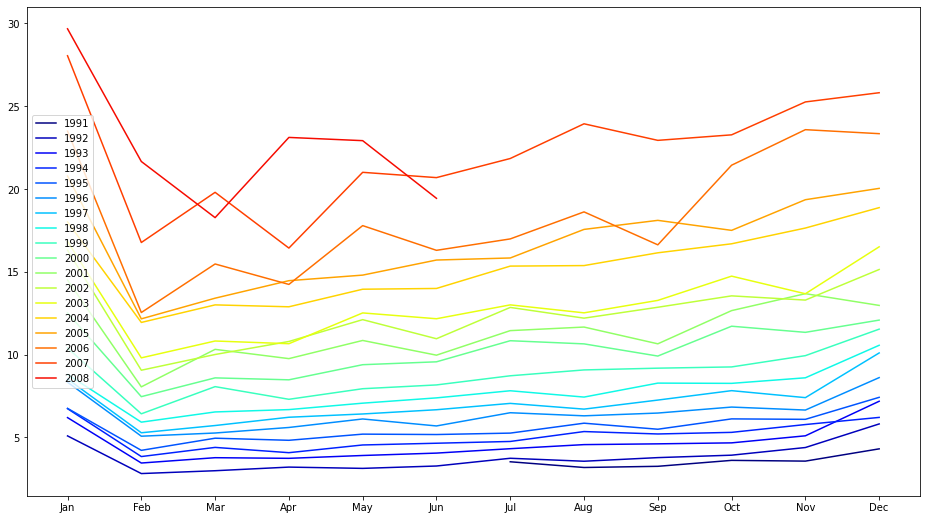

In [ ]:
#the same with a bit of formatting

colors = plt.cm.jet(np.linspace(0,1,20)) # to define a scaling of colors
label_x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] # to visualize the months

c = 0 # to change gradually the colors

plt.figure(figsize=(16,9))

for i in df['year'].unique():
  index_year = df['year'] == i
  plt.plot(df[index_year]['month'],df[index_year]['value'], color = colors[c], label = str(i))
  c +=1

plt.legend(loc='center left')
plt.xticks(np.arange(1,13),labels = label_x)
plt.show()

## Seasonal subseries

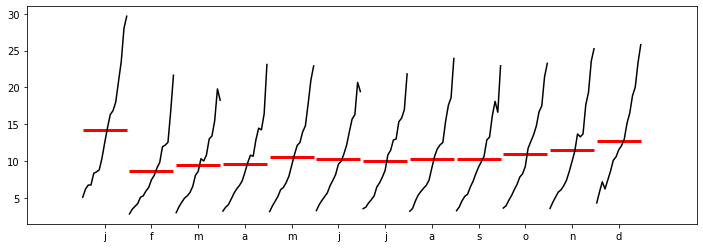

In [ ]:
# another chart basically giving the same information in a different format (can spot different things)
fig = month_plot(df.set_index('date')['value'])

## Scatter plots and correlations

Let's take the data from the file elecdemand.csv. Half-hourly and daily electricity demand for Victoria, Australia, in 2014 (source R dataset from https://vincentarelbundock.github.io/Rdatasets/datasets.html)

In [ ]:
df = pd.read_csv('elecdemand.csv',index_col = 0)
df.head()

,Demand,WorkDay,Temperature
1,3.914647,0,18.2
2,3.672550,0,17.9
3,3.497539,0,17.6
4,3.339145,0,16.8
5,3.204313,0,16.3


In [ ]:
#from the description we can assume the dates
df['date'] = np.datetime64('2014-01-01 00:30:00', 'm') + np.arange(len(df))*30
df.tail()

,Demand,WorkDay,Temperature,date
17516,3.724836,1,17.7,2014-12-31 22:00:00
17517,3.761887,1,17.3,2014-12-31 22:30:00
17518,3.809415,1,17.1,2014-12-31 23:00:00
17519,4.135946,1,16.7,2014-12-31 23:30:00
17520,4.217047,1,16.6,2015-01-01 00:00:00


In [ ]:
df.describe()

,Demand,WorkDay,Temperature
count,17520.000000,17520.000000,17520.000000
mean,4.609947,0.687671,16.505417
std,0.877780,0.463456,5.613729
min,2.857946,0.000000,1.500000
25%,3.927284,0.000000,12.600000
50%,4.596284,1.000000,15.800000
75%,5.159062,1.000000,19.400000
max,9.345004,1.000000,43.200000


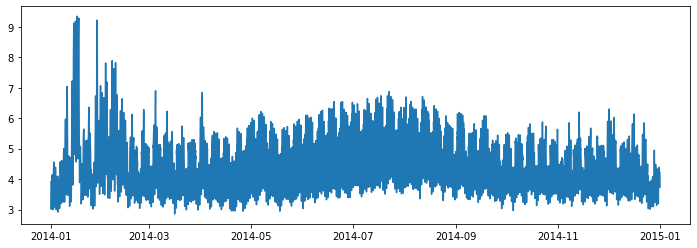

In [ ]:
plt.plot(df['date'],df['Demand'])

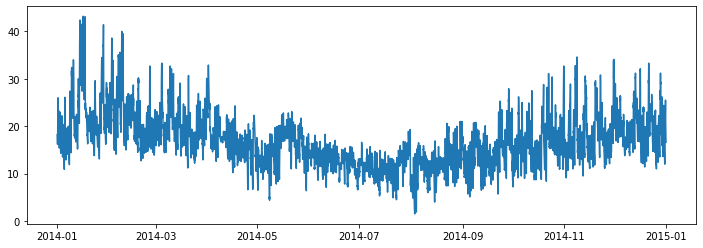

In [ ]:
plt.plot(df['date'],df['Temperature'])

Text(0.5, 0, 'temperature')

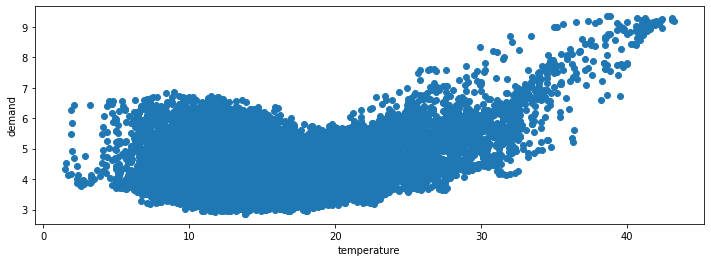

In [ ]:
plt.scatter(df['Temperature'], df['Demand'])
plt.ylabel('demand')
plt.xlabel('temperature')

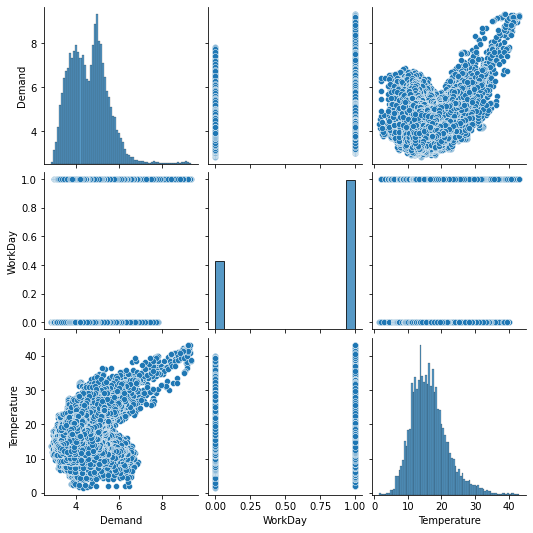

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


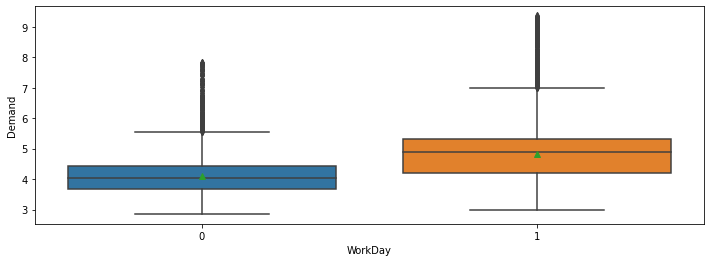

In [ ]:
# scatter plots are not the most efficient for categorical variables like WorkDay; boxplot are more interesting
sns.boxplot(df["WorkDay"], df["Demand"], showmeans = True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


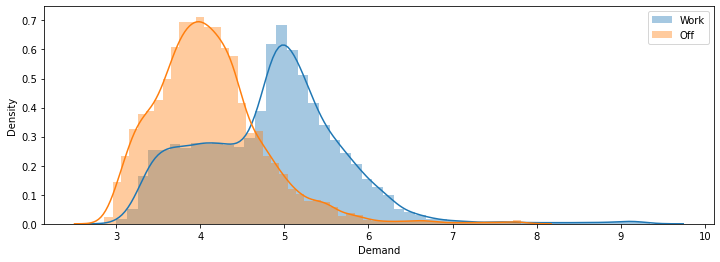

In [ ]:
# you can look at distributions also, for each categorical variables
work_day = df["WorkDay"] == 1
off_day = df["WorkDay"] == 0
sns.distplot(df[work_day]['Demand'], label = "Work")
sns.distplot(df[off_day]['Demand'], label = "Off")
plt.legend()

# Autocorrelation function (ACF)

## ACF

Let's take the data from the file qauselec.csv. Quarterly Australian Electricity production (source R dataset from https://vincentarelbundock.github.io/Rdatasets/datasets.html). 

In [ ]:
df = pd.read_csv('qauselec.csv', index_col = 0)
df['year']=np.trunc(df['time']).astype(int)
df['quarter'] = np.round((df['time'] - df['year'])*4+1).astype(int)
df['month'] = df['quarter'].map({1: 3, 2: 6, 3:9,4:12})
df['day'] = df['quarter'].map({1: 31, 2: 30, 3:30,4:31})
df['date'] = pd.to_datetime(df[['year','month','day']])
df.head()

,time,value,year,quarter,month,day,date
1,1956.00,3.923,1956,1,3,31,1956-03-31
2,1956.25,4.436,1956,2,6,30,1956-06-30
3,1956.50,4.806,1956,3,9,30,1956-09-30
4,1956.75,4.418,1956,4,12,31,1956-12-31
5,1957.00,4.339,1957,1,3,31,1957-03-31


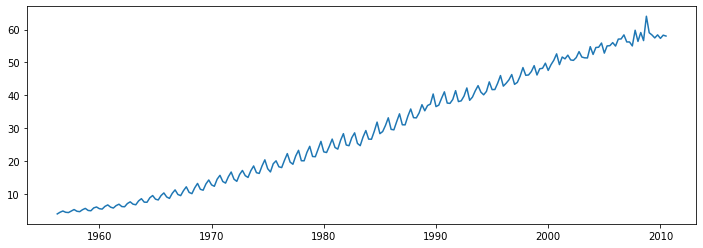

In [ ]:
plt.plot(df['date'], df['value'])
plt.show()

In [ ]:
# before using a function it is good to know how it works

def acf_by_hand(x, lag):
  # Slice the relevant subseries based on the lag
  x1 = x[:(len(x)-lag)]
  x2 = x[lag:]
  # Subtract the mean of the whole series x to calculate Cov
  sum_product = np.sum((x1-np.mean(x1))*(x2-np.mean(x2)))
  # Normalize with var of whole series

  #corr_coeff = sum_product / ((len(x) - lag) * np.sqrt(np.var(x1))*np.sqrt(np.var(x2)))
  corr_coeff = sum_product / ((len(x) - lag) * np.sqrt(np.var(x1))*np.sqrt(np.var(x2)))
  return corr_coeff

In [ ]:
len(acf(df['value'],nlags = nlag))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


21

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


(-1.1, 1.1)

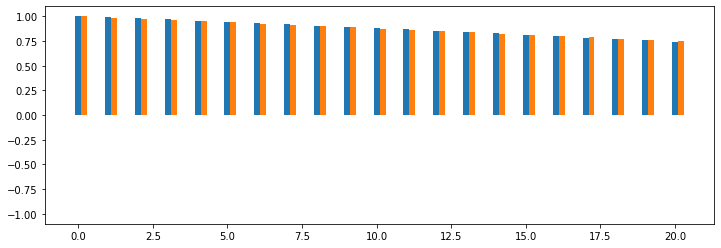

In [ ]:
#let's now calculate the coefficients for up to a certain lag

nlag = 20
my_acf = np.zeros(nlag+1)

for i in range(0,nlag+1):
  my_acf[i] = acf_by_hand(df['value'], i)

plt.bar(np.arange(0,nlag+1),my_acf,width = 0.2)
plt.bar(np.arange(0,nlag+1)+0.2,acf(df['value'],nlags = nlag),width = 0.2)
plt.ylim([-1.1,1.1])

[1.         0.98356895 0.97031007 0.96147855 0.95466331 0.93845663
 0.92450311 0.91458708 0.90443295 0.88825114 0.87317154 0.8634735
 0.8541655  0.83789354 0.82341917 0.8131723  0.80400635 0.7862236
 0.77066366 0.76038063 0.75143899 0.7337662  0.71826063 0.7083866
 0.69851036 0.68059231 0.6648     0.65439899 0.6444746  0.62752755
 0.61275915 0.60212329 0.59228391 0.57483931 0.55986361 0.54912512
 0.53904754 0.52126577 0.50546916 0.49493778 0.48418151]


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


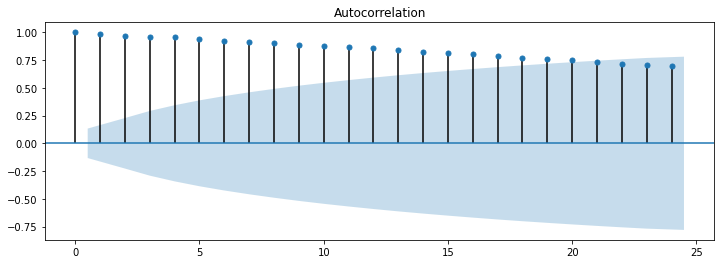

In [ ]:
# the function however does it for us and plot it. Using acf gives you the coefficients
fig = plot_acf(df['value'])

print(acf(df['value']))